## Consider only the below columns and prepare a prediction model for predicting Price.
## ["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]
### (Use Dataset 'ToyotaCorolla')

### Importing Libraries and Dataset


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
data = pd.read_csv("C:\Vishal\ExcelR\Data Science\Assignments\ToyotaCorolla.csv")

In [3]:
#Creating dataset of required data
Toyota_Corolla = data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
Toyota_Corolla.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


### Performing Exploratory Data Analysis

In [4]:
Toyota_Corolla.info()
#No Null values detected & correct data types present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [5]:
#Feature Engineering - Renaming columns
Toyota_Corolla.rename({'Age_08_04':'Age','cc':'CC'},axis=1,inplace=True)

C:\Users\chaud\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [6]:
#Checking for duplicate row
Toyota_Corolla[Toyota_Corolla.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [7]:
#Dropping a duplicate row
Toyota_Corolla=Toyota_Corolla.drop_duplicates().reset_index(drop=True)

<AxesSubplot:xlabel='Price'>

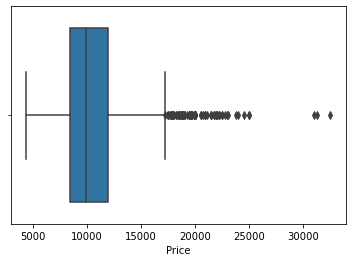

In [8]:
#Checking for outliers
sns.boxplot(x = Toyota_Corolla.Price)

<AxesSubplot:xlabel='Age'>

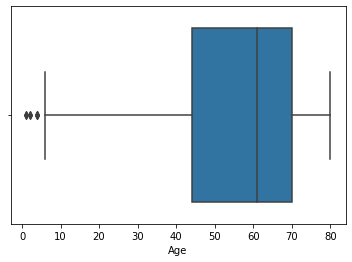

In [9]:
sns.boxplot(x = Toyota_Corolla.Age)

<AxesSubplot:xlabel='KM'>

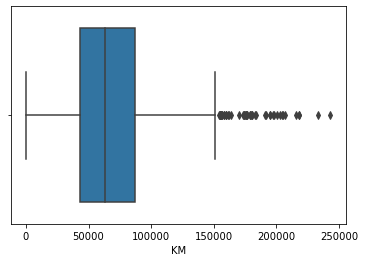

In [10]:
sns.boxplot(x = Toyota_Corolla.KM)

<AxesSubplot:xlabel='HP'>

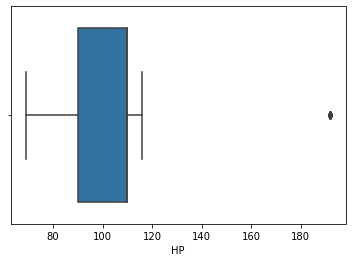

In [11]:
sns.boxplot(x = Toyota_Corolla.HP)

<AxesSubplot:xlabel='CC'>

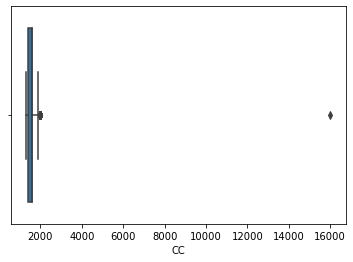

In [12]:
sns.boxplot(x = Toyota_Corolla.CC)

<AxesSubplot:xlabel='Doors'>

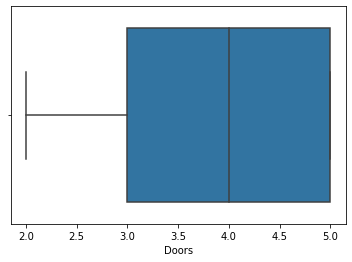

In [13]:
sns.boxplot(x = Toyota_Corolla.Doors)

<AxesSubplot:xlabel='Gears'>

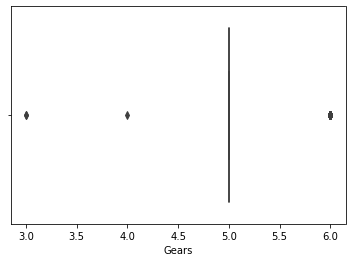

In [14]:
sns.boxplot(x = Toyota_Corolla.Gears)

<AxesSubplot:xlabel='Quarterly_Tax'>

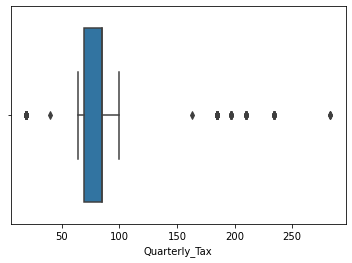

In [15]:
sns.boxplot(x = Toyota_Corolla.Quarterly_Tax)

<AxesSubplot:xlabel='Weight'>

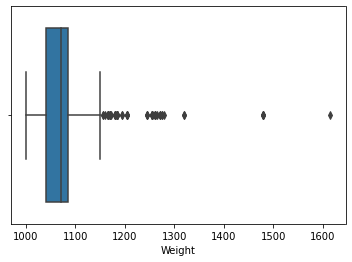

In [16]:
sns.boxplot(x = Toyota_Corolla.Weight)

In [17]:
## Price, Age_08_04, KM, HP, cc, Gears, Quarterly_Tax & Weight columns have outliers and we'll need to treat them
## Writing function for IQR Capping

Toyota_Corolla.describe()
features = ["Price","Age","KM","HP","CC","Gears","Quarterly_Tax","Weight",]
features

def iqr_capping(df, cols, factor):
    for col in cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_whisker = q3 + (factor * iqr)
        lower_whisker = q1 - (factor * iqr)

        df[col] = np.where(df[col] > upper_whisker, upper_whisker, np.where(df[col] < lower_whisker, lower_whisker, df[col]))

In [18]:
iqr_capping(Toyota_Corolla, features, 1.5)

### Correlation Analysis

<AxesSubplot:>

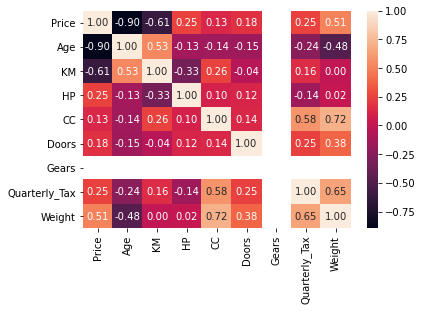

In [19]:
sns.heatmap(Toyota_Corolla.corr(), annot = True, fmt = '.2f')

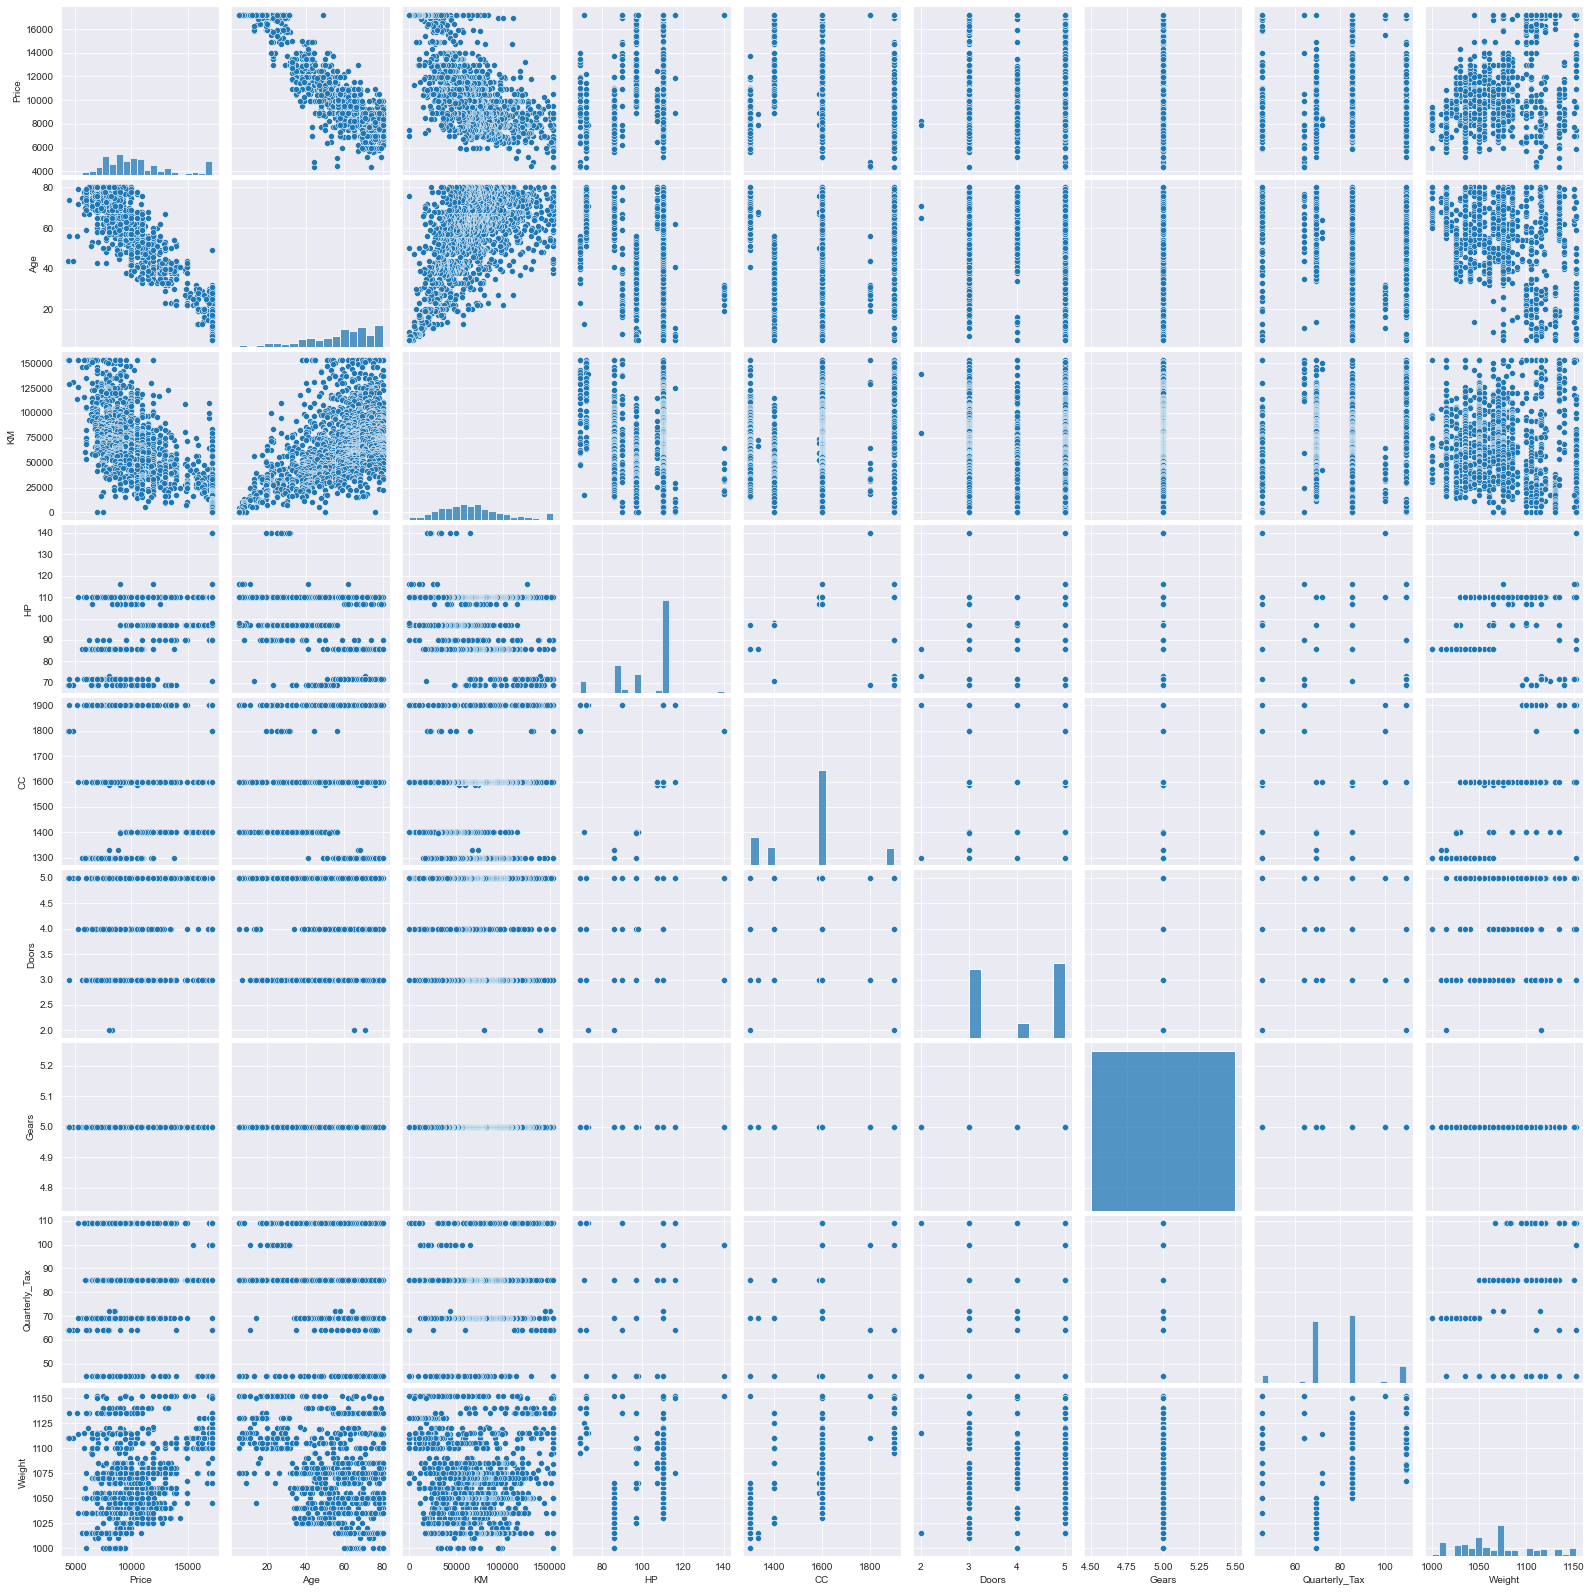

In [20]:
# Scatterplot between variables along with histograms
sns.set_style(style='darkgrid')
sns.pairplot(Toyota_Corolla)

### Model Building 

In [21]:
Model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+Quarterly_Tax+Weight',data=Toyota_Corolla).fit()

### Model Testing

In [22]:
# Finding Coefficient parameters
Model.params

Intercept       -177.340730
Age             -106.190521
KM                -0.016062
HP                29.249088
CC                -2.697257
Doors           -108.689168
Gears           -886.703648
Quarterly_Tax     13.561143
Weight            21.291566
dtype: float64

In [23]:
# Finding tvalues and pvalues
print('t-values: ', '\n',np.round((Model.tvalues),5), 'p-values: ', '\n',np.round((Model.pvalues),6))

t-values:  
 Intercept        -3.34468
Age             -46.86189
KM              -13.93541
HP               11.62532
CC               -9.14594
Doors            -3.15507
Gears            -3.34468
Quarterly_Tax     4.95035
Weight           13.91345
dtype: float64 p-values:  
 Intercept        0.000845
Age              0.000000
KM               0.000000
HP               0.000000
CC               0.000000
Doors            0.001638
Gears            0.000845
Quarterly_Tax    0.000001
Weight           0.000000
dtype: float64


In [24]:
# Finding rsquared values
print('rsquared value: ', Model.rsquared ,'\n','Adjusted rsquare value: ', Model.rsquared_adj) 
# model accuracy is 86.55 %

rsquared value:  0.8661809342814353 
 Adjusted rsquare value:  0.8655244987803631


### Model Validation Techniques

In [25]:
# Collinearity problem check
# Calculating Value Inflation Factor : VIF = 1/(1-Rsquare) for all independent variables

rsq_Age = smf.ols('Age~KM+HP+CC+Doors+Gears+Quarterly_Tax+Weight', data = Toyota_Corolla).fit().rsquared
vif_Age = 1/(1-rsq_Age)

rsq_KM = smf.ols('KM~Age+HP+CC+Doors+Gears+Quarterly_Tax+Weight', data = Toyota_Corolla).fit().rsquared
vif_KM = 1/(1-rsq_KM)

rsq_HP = smf.ols('HP~KM+Age+CC+Doors+Gears+Quarterly_Tax+Weight', data = Toyota_Corolla).fit().rsquared
vif_HP = 1/(1-rsq_HP)

rsq_CC = smf.ols('CC~HP+KM+Age+Doors+Gears+Quarterly_Tax+Weight', data = Toyota_Corolla).fit().rsquared
vif_CC = 1/(1-rsq_CC)

rsq_Doors = smf.ols('Doors~CC+HP+KM+Age+Gears+Quarterly_Tax+Weight', data = Toyota_Corolla).fit().rsquared
vif_Doors = 1/(1-rsq_Doors)

rsq_Gears = smf.ols('Gears~Doors+CC+HP+KM+Age+Quarterly_Tax+Weight', data = Toyota_Corolla).fit().rsquared
vif_Gears = 1/(1-rsq_Gears)

rsq_Quarterly_Tax = smf.ols('Quarterly_Tax~Gears+Doors+CC+HP+KM+Age+Weight', data = Toyota_Corolla).fit().rsquared
vif_Quarterly_Tax = 1/(1-rsq_Quarterly_Tax)

rsq_Weight = smf.ols('Weight~Quarterly_Tax+Gears+Doors+CC+HP+KM+Age', data = Toyota_Corolla).fit().rsquared
vif_Weight = 1/(1-rsq_Weight)

# Putting these values in a DataFrame
d={'Features':['Age', 'KM', 'HP', 'CC', 'Doors','Gears', 'Quarterly_Tax', 'Weight'],
   'VIF':[vif_Age, vif_KM, vif_HP, vif_CC, vif_Doors, vif_Gears, vif_Quarterly_Tax, vif_Weight]}
VIF_df = pd.DataFrame(d)
VIF_df

C:\Users\chaud\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,Features,VIF
0,Age,2.120526
1,KM,1.926808
2,HP,1.315787
3,CC,2.980206
4,Doors,1.295417
5,Gears,0.000000
6,Quarterly_Tax,1.950592
7,Weight,4.007977


In [26]:
# None of the features has VIF>20, No Collinearity, so we can consider all varaibles in Regression equation

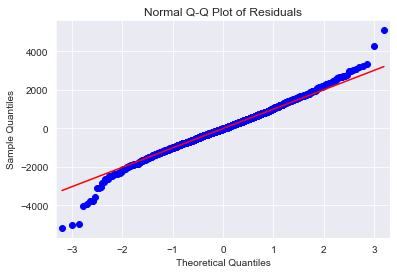

In [27]:
# 2) Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)
sm.qqplot(Model.resid,line='q') # 'q' - A line is fit through the quartiles # line = '45'- to draw the 45-degree diagonal line
plt.title("Normal Q-Q Plot of Residuals")
plt.show()

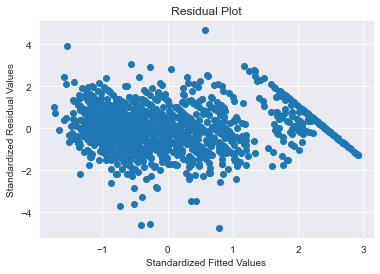

In [28]:
# 3) Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)
# Creating a function for z = (x - mu)/σ
def standard_values(vals) : return (vals-vals.mean())/vals.std() 
# Plotting a scatter plot
plt.scatter(standard_values(Model.fittedvalues),standard_values(Model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

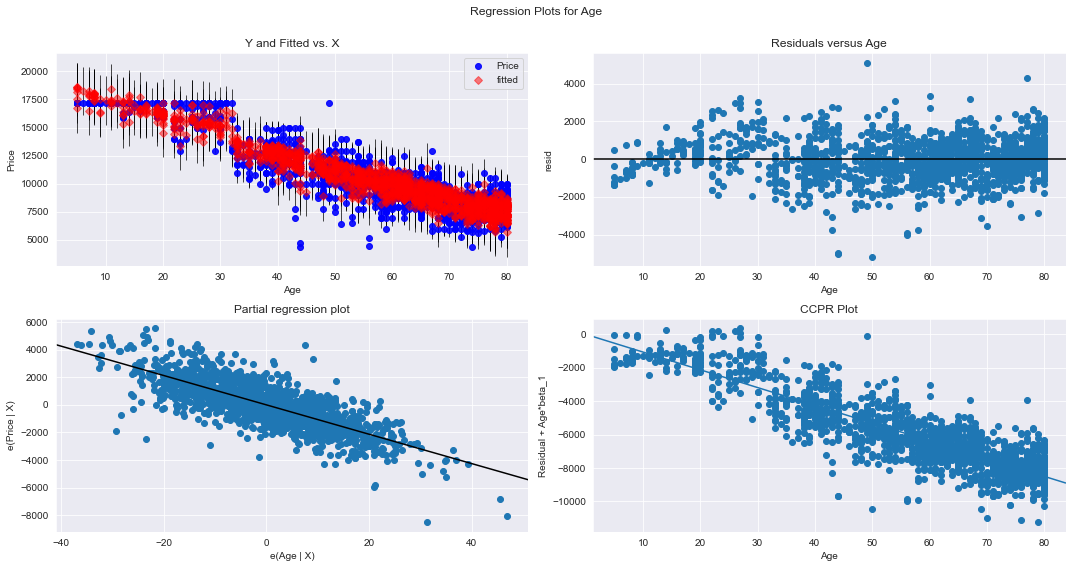

In [29]:
# 4) Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)    # exog = x-variable & endog = y-variable

fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(Model,'Age',fig=fig)
plt.show()

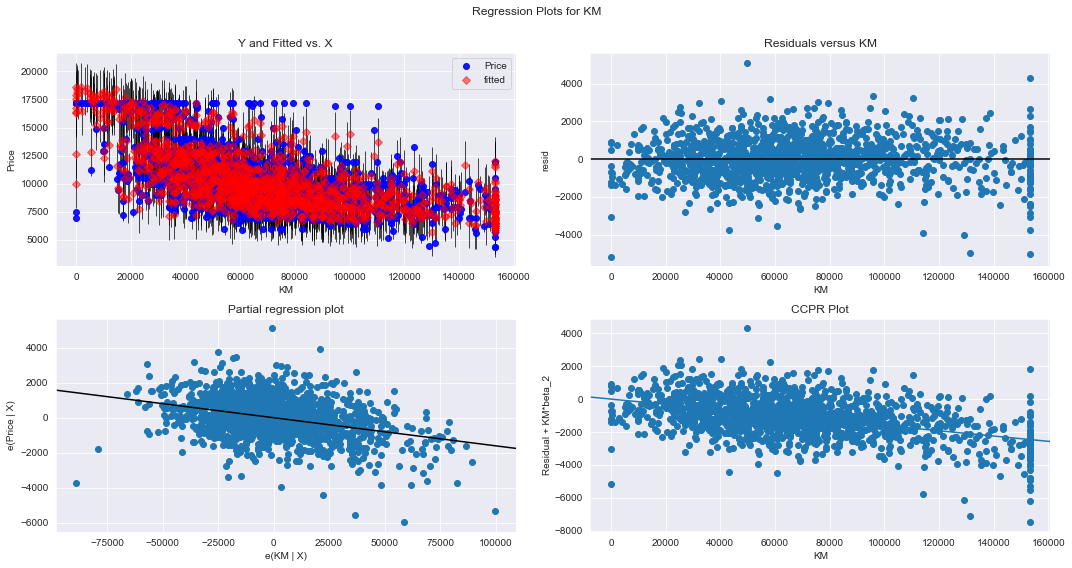

In [30]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(Model,'KM',fig=fig)
plt.show()

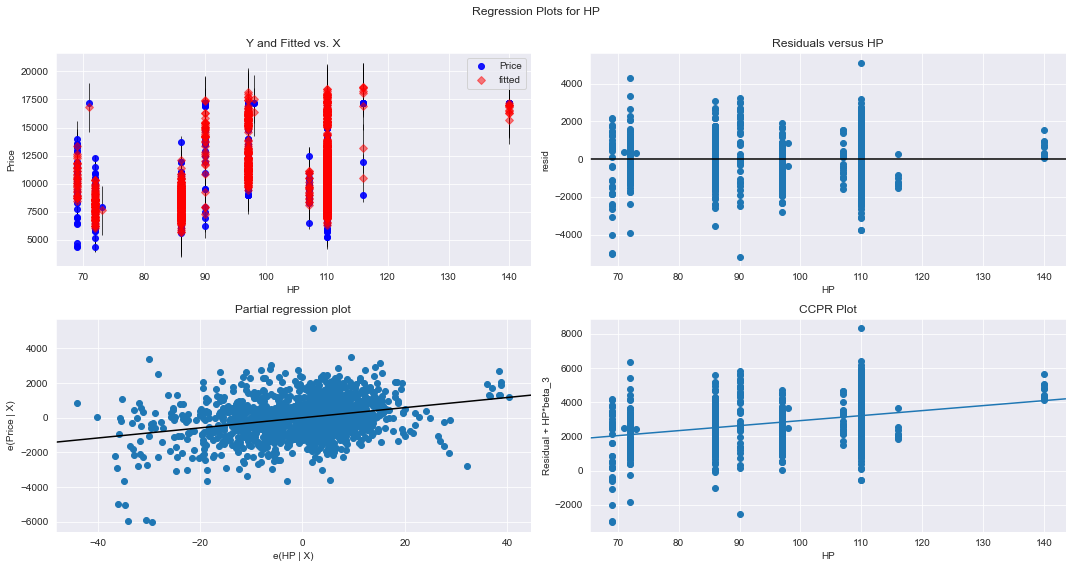

In [31]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(Model,'HP',fig=fig)
plt.show()

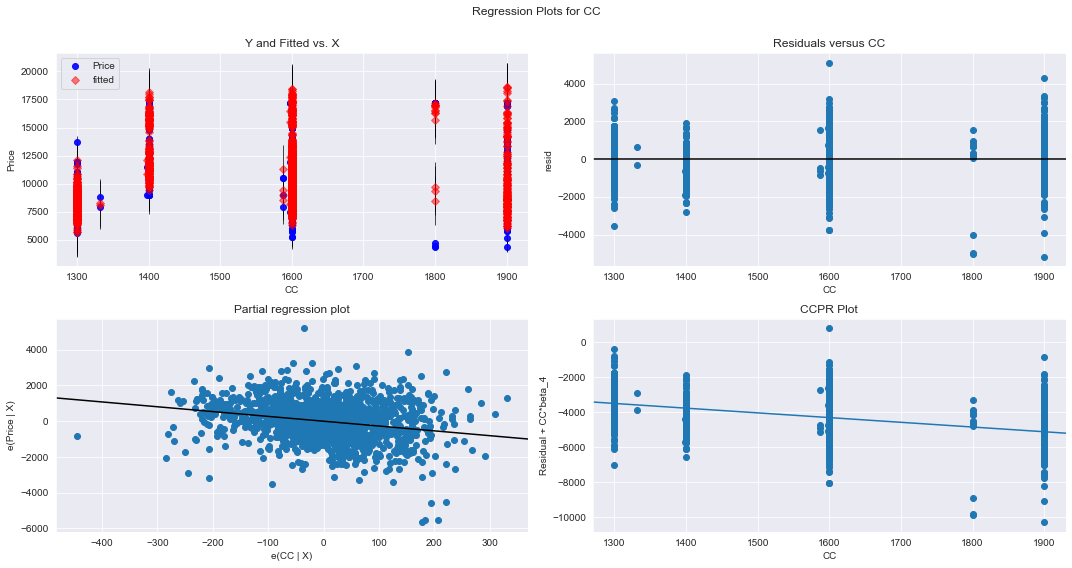

In [32]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(Model,'CC',fig=fig)
plt.show()

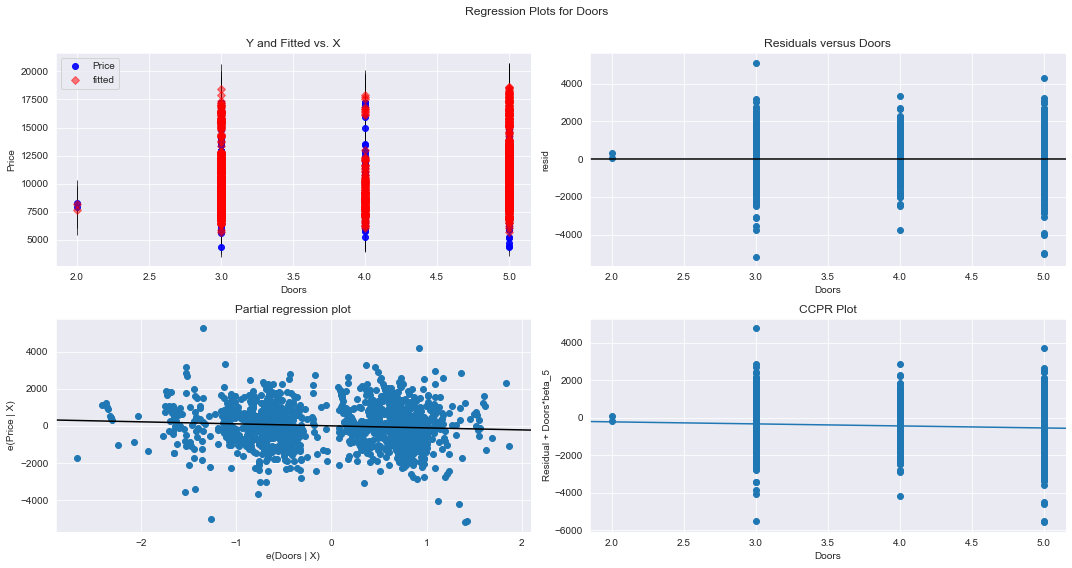

In [33]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(Model,'Doors',fig=fig)
plt.show()

ValueError: specify slope and intercepty or model_results

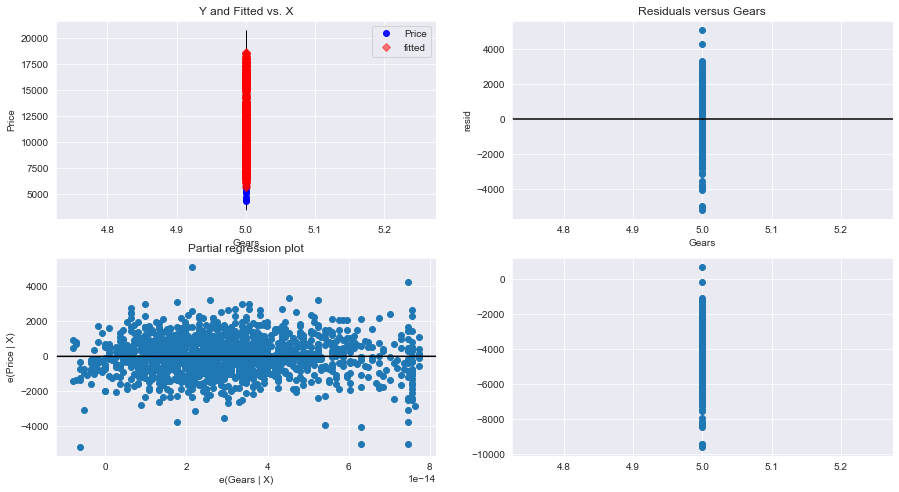

In [34]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(Model,'Gears',fig=fig)
plt.show()

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(Model,'Quarterly_Tax',fig=fig)
plt.show()

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(Model,'Weight',fig=fig)
plt.show()

### Model Deletion Diagnostics (Checking for Outliers or Influencers)

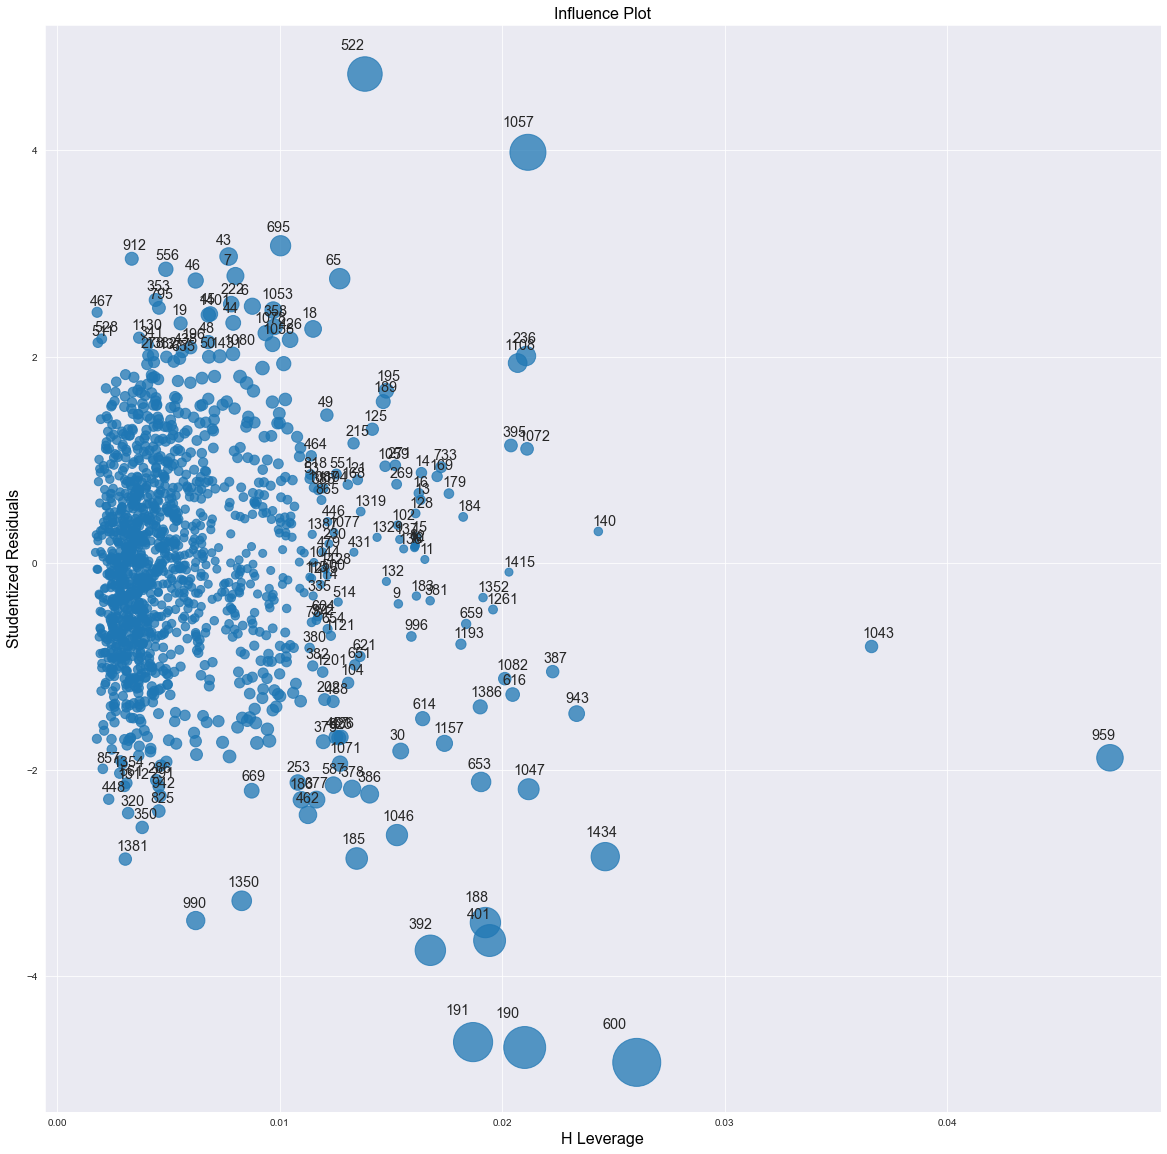

In [35]:
# Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(Model,ax = ax)

In [36]:
# Leverage Cuttoff Value = 3*(k+1)/n where, k = No.of features/columns & n = no. of datapoints
k=Toyota_Corolla.shape[1]
n=Toyota_Corolla.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020905923344947737

In [37]:
# Hence points beyond 0.021 in the above plot are Outliers
Toyota_Corolla[Toyota_Corolla.index.isin([959])]

,Price,Age,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
959,9390.0,66.0,50806.0,86.0,1300.0,3,5.0,45.0,1152.5


### Improving the Model

In [38]:
# Creating a copy of the original dataset 
Toyota_Corolla_New=Toyota_Corolla.copy()
Toyota_Corolla_New

,Price,Age,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
0,13500.0,23.0,46986.0,90.0,1900.0,3,5.0,109.0,1152.5
1,13750.0,23.0,72937.0,90.0,1900.0,3,5.0,109.0,1152.5
2,13950.0,24.0,41711.0,90.0,1900.0,3,5.0,109.0,1152.5
3,14950.0,26.0,48000.0,90.0,1900.0,3,5.0,109.0,1152.5
4,13750.0,30.0,38500.0,90.0,1900.0,3,5.0,109.0,1152.5
...,...,...,...,...,...,...,...,...,...
1430,7500.0,69.0,20544.0,86.0,1300.0,3,5.0,69.0,1025.0
1431,10845.0,72.0,19000.0,86.0,1300.0,3,5.0,69.0,1015.0
1432,8500.0,71.0,17016.0,86.0,1300.0,3,5.0,69.0,1015.0
1433,7250.0,70.0,16916.0,86.0,1300.0,3,5.0,69.0,1015.0


In [39]:
# Discarding the influence point
Toyota_Corolla_New=Toyota_Corolla_New.drop(Toyota_Corolla_New.index[[959]],axis=0).reset_index(drop=True)
Toyota_Corolla_New

,Price,Age,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
0,13500.0,23.0,46986.0,90.0,1900.0,3,5.0,109.0,1152.5
1,13750.0,23.0,72937.0,90.0,1900.0,3,5.0,109.0,1152.5
2,13950.0,24.0,41711.0,90.0,1900.0,3,5.0,109.0,1152.5
3,14950.0,26.0,48000.0,90.0,1900.0,3,5.0,109.0,1152.5
4,13750.0,30.0,38500.0,90.0,1900.0,3,5.0,109.0,1152.5
...,...,...,...,...,...,...,...,...,...
1429,7500.0,69.0,20544.0,86.0,1300.0,3,5.0,69.0,1025.0
1430,10845.0,72.0,19000.0,86.0,1300.0,3,5.0,69.0,1015.0
1431,8500.0,71.0,17016.0,86.0,1300.0,3,5.0,69.0,1015.0
1432,7250.0,70.0,16916.0,86.0,1300.0,3,5.0,69.0,1015.0


### Model - Re-build, Re-check and Re-improve - 1

In [40]:
Model1=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+Quarterly_Tax+Weight',data=Toyota_Corolla_New).fit()

In [41]:
# Get influencers using cook's distance
# Cook's Distance: If Cook's distance > 0.5, then it's an outlier
(c,_)=Model1.get_influence().cooks_distance
c

array([3.06749349e-03, 1.22302935e-03, 1.78087822e-03, ...,
       6.88516631e-05, 1.91795191e-03, 2.38619627e-02])

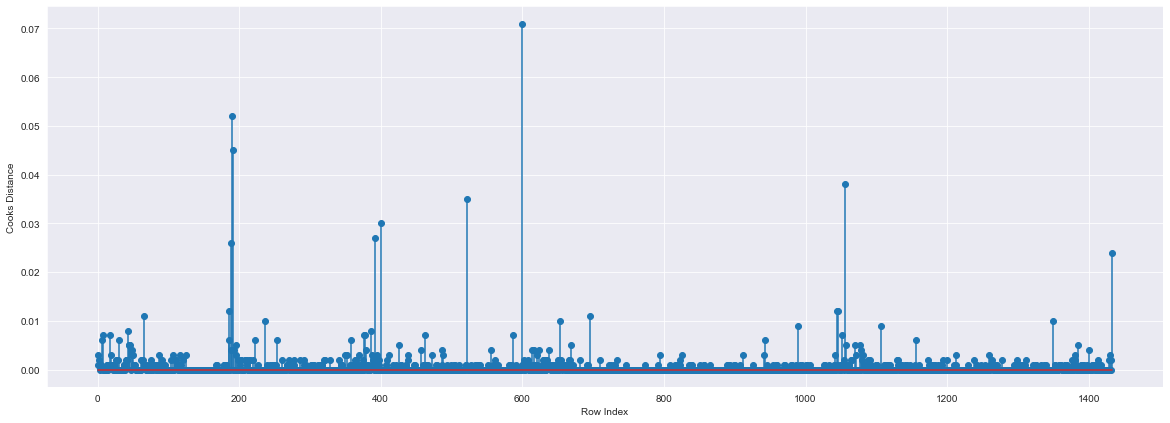

In [42]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(Toyota_Corolla_New)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [43]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(600, 0.07081074575888872)

In [44]:
# Discard the data points which are influencers and reassign the row number (reset_index())
Toyota_Corolla_New=Toyota_Corolla_New.drop(Toyota_Corolla_New.index[[600]],axis=0).reset_index(drop=True)
Toyota_Corolla_New

,Price,Age,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
0,13500.0,23.0,46986.0,90.0,1900.0,3,5.0,109.0,1152.5
1,13750.0,23.0,72937.0,90.0,1900.0,3,5.0,109.0,1152.5
2,13950.0,24.0,41711.0,90.0,1900.0,3,5.0,109.0,1152.5
3,14950.0,26.0,48000.0,90.0,1900.0,3,5.0,109.0,1152.5
4,13750.0,30.0,38500.0,90.0,1900.0,3,5.0,109.0,1152.5
...,...,...,...,...,...,...,...,...,...
1428,7500.0,69.0,20544.0,86.0,1300.0,3,5.0,69.0,1025.0
1429,10845.0,72.0,19000.0,86.0,1300.0,3,5.0,69.0,1015.0
1430,8500.0,71.0,17016.0,86.0,1300.0,3,5.0,69.0,1015.0
1431,7250.0,70.0,16916.0,86.0,1300.0,3,5.0,69.0,1015.0


### Model - Re-build, Re-check and Re-improve - 2

In [45]:
Model2=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+Quarterly_Tax+Weight',data=Toyota_Corolla_New).fit()

In [46]:
# Get influencers using cook's distance
# Cook's Distance: If Cook's distance > 0.5, then it's an outlier
(c2,_)=Model2.get_influence().cooks_distance
c2

array([3.27360792e-03, 1.30156327e-03, 1.93832480e-03, ...,
       8.25895972e-05, 2.01611808e-03, 2.65098755e-02])

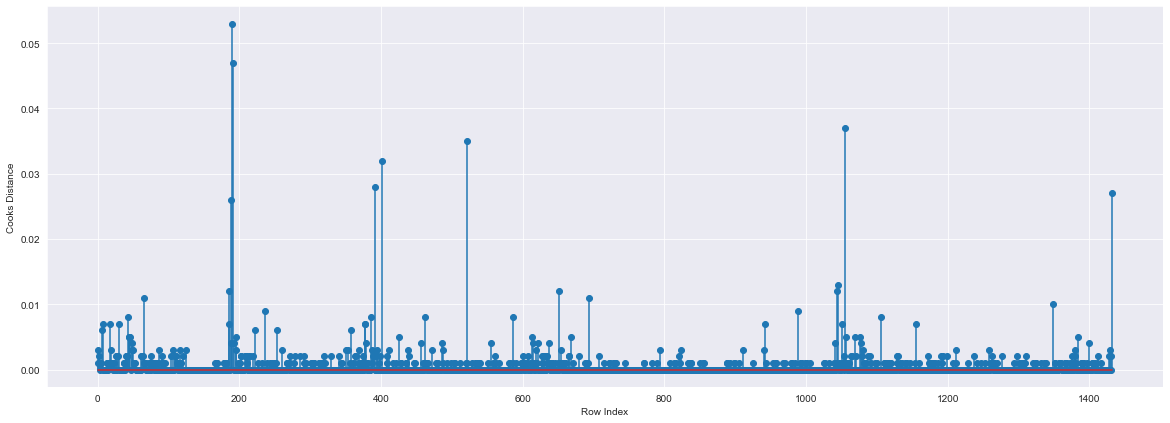

In [47]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(Toyota_Corolla_New)),np.round(c2,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [48]:
# Index and value of influencer where C>0.5
np.argmax(c2) , np.max(c2)

(190, 0.05344304159483249)

In [49]:
# Discard the data points which are influencers and reassign the row number (reset_index())
Toyota_Corolla_New=Toyota_Corolla_New.drop(Toyota_Corolla_New.index[[190]],axis=0).reset_index(drop=True)
Toyota_Corolla_New

,Price,Age,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
0,13500.0,23.0,46986.0,90.0,1900.0,3,5.0,109.0,1152.5
1,13750.0,23.0,72937.0,90.0,1900.0,3,5.0,109.0,1152.5
2,13950.0,24.0,41711.0,90.0,1900.0,3,5.0,109.0,1152.5
3,14950.0,26.0,48000.0,90.0,1900.0,3,5.0,109.0,1152.5
4,13750.0,30.0,38500.0,90.0,1900.0,3,5.0,109.0,1152.5
...,...,...,...,...,...,...,...,...,...
1427,7500.0,69.0,20544.0,86.0,1300.0,3,5.0,69.0,1025.0
1428,10845.0,72.0,19000.0,86.0,1300.0,3,5.0,69.0,1015.0
1429,8500.0,71.0,17016.0,86.0,1300.0,3,5.0,69.0,1015.0
1430,7250.0,70.0,16916.0,86.0,1300.0,3,5.0,69.0,1015.0


### Model - Re-build, Re-check and Re-improve - 2

In [50]:
Model3=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+Quarterly_Tax+Weight',data=Toyota_Corolla_New).fit()

In [51]:
# Get influencers using cook's distance
# Cook's Distance: If Cook's distance > 0.4, then it's an outlier
(c3,_)=Model3.get_influence().cooks_distance
c3

array([3.34261533e-03, 1.35255195e-03, 1.97605957e-03, ...,
       7.34777637e-05, 2.00018654e-03, 2.71198094e-02])

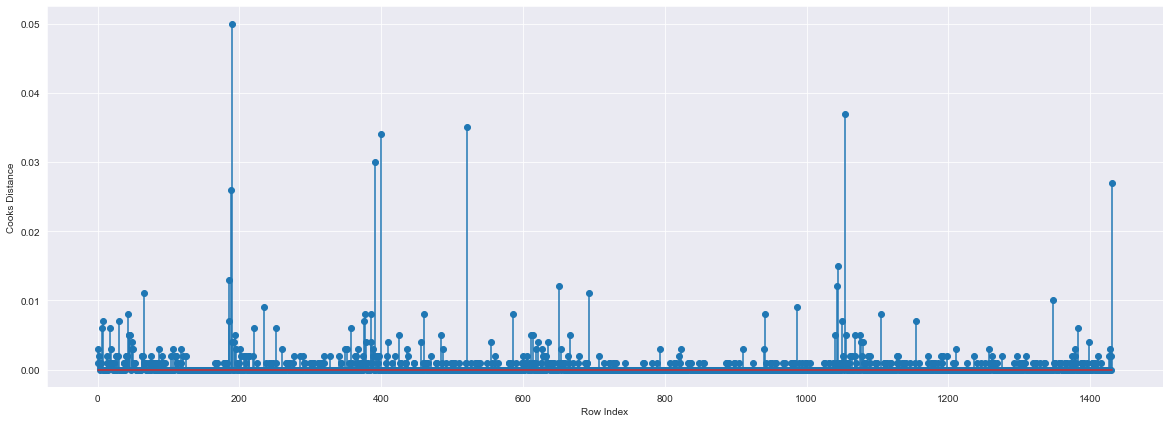

In [52]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(Toyota_Corolla_New)),np.round(c3,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [53]:
# Index and value of influencer where C>0.5
np.argmax(c3) , np.max(c3)

(190, 0.050437850904120986)

In [54]:
# Discard the data points which are influencers and reassign the row number (reset_index())
Toyota_Corolla_New=Toyota_Corolla_New.drop(Toyota_Corolla_New.index[[190]],axis=0).reset_index(drop=True)
Toyota_Corolla_New

,Price,Age,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
0,13500.0,23.0,46986.0,90.0,1900.0,3,5.0,109.0,1152.5
1,13750.0,23.0,72937.0,90.0,1900.0,3,5.0,109.0,1152.5
2,13950.0,24.0,41711.0,90.0,1900.0,3,5.0,109.0,1152.5
3,14950.0,26.0,48000.0,90.0,1900.0,3,5.0,109.0,1152.5
4,13750.0,30.0,38500.0,90.0,1900.0,3,5.0,109.0,1152.5
...,...,...,...,...,...,...,...,...,...
1426,7500.0,69.0,20544.0,86.0,1300.0,3,5.0,69.0,1025.0
1427,10845.0,72.0,19000.0,86.0,1300.0,3,5.0,69.0,1015.0
1428,8500.0,71.0,17016.0,86.0,1300.0,3,5.0,69.0,1015.0
1429,7250.0,70.0,16916.0,86.0,1300.0,3,5.0,69.0,1015.0


### Final Model

In [55]:
Final_Model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+Quarterly_Tax+Weight',data=Toyota_Corolla_New).fit()

In [56]:
# Finding rsquared values
print('rsquared value: ', Final_Model.rsquared, 'rsquare adjusted value: ', Final_Model.rsquared_adj)  
# Model accuracy is improved to 87.14 %

rsquared value:  0.8720602339886303 rsquare adjusted value:  0.8714308746336903


### Predicting Price of a Car Using Model!

In [103]:
#Making prediction using given data
#Comparing Actual and Predicted Price of the Cars
Actual = pd.DataFrame(Toyota_Corolla_New.Price)
Predicted = pd.DataFrame(Final_Model.predict(), columns=['Predicted Price'])
pd.concat([Actual, Predicted], axis = 1)

,Price,Predicted Price
0,13500.0,15450.132141
1,13750.0,15033.045212
2,13950.0,15428.699530
3,14950.0,15115.196304
4,13750.0,14843.029559
...,...,...
1426,7500.0,9182.441821
1427,10845.0,8664.274400
1428,8500.0,8802.374347
1429,7250.0,8910.194468


In [109]:
#Predicting price using unknown data
new_data=pd.DataFrame({'Age':10, "KM":50000, "HP":60, "CC":1200, "Doors":4, "Gears":5, "Quarterly_Tax":700, "Weight":1012},index=[0])
print('The predicted price of the car is: ', Final_Model.predict(new_data))

The predicted price of the car is:  0    19989.017191
dtype: float64
